# Interpolación: el método de Kriging

**Objetivos**.
- Entender e implementar el método de Krigging.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

# Introducción

El método de Kriging, también conocido como interpolación espacial, es una técnica estadística utilizada para interpolar valores entre puntos de datos espaciados irregularmente en un campo continuo. Este método se utiliza comúnmente en la geostadística y en la modelización espacial para estimar valores desconocidos en ubicaciones no muestreadas. En resumen realiza lo siguiente:

1. Datos de entrada: recopilar datos de observación en diferentes ubicaciones en un área específica.

2. Modelado de la variabilidad espacial: El método de Kriging asume que los datos observados están correlacionados espacialmente. Esto significa que los valores observados cerca unos de otros tienden a ser más similares que los valores observados a mayores distancias. Para modelar esta variabilidad espacial, se utiliza un modelo de semivariograma o covarianza. Este modelo describe cómo varía la diferencia entre los valores observados en función de la distancia y la dirección.

3. Predicción del valor desconocido: Una vez que se ha modelado la variabilidad espacial utilizando el semivariograma, se puede utilizar para predecir el valor desconocido en una ubicación no muestreada. La predicción se realiza mediante una combinación lineal ponderada de los valores observados más cercanos, donde los pesos de la combinación están determinados por la estructura de correlación espacial modelada en el semivariograma.

4. Estimación de la incertidumbre: Además de proporcionar una estimación del valor desconocido, el método de Kriging también puede proporcionar una estimación de la incertidumbre asociada con la predicción. Esta incertidumbre se calcula utilizando la varianza de la predicción, que tiene en cuenta tanto la variabilidad observada en los datos como la incertidumbre en la estructura de correlación espacial modelada por el semivariograma.

Un variograma es una descripción visual de la covarianza exhibida entre cada par de puntos de la muestra. El resultado refleja la distancia máxima y la forma en que un punto tiene influencia sobre otro a diferentes distancias.

Para cada par de puntos de la muestra, el valor-gamma o semivarianza (una medida de la diferencia media cuadrática entre los valores) es graficado contra la distancia o "lag" que hay entre ellos.

Los modelos de variograma se escogen a partir de un número limitado de funciones "permitidas" como la función lineal, esférica, exponencial y de potencia.

La elección del modelo del variograma recae en el usuario aunque existen programas que pueden ayudar a definir los mejores modelos de ajuste usando varias técnicas como mínimos cuadrados, estimador máximo verosímil y métodos Bayesianos.

Hay **tres suposiciones** que uno hace al momento de estar interpolando por Kriging.
* **Los datos tienen una distribución normal**

* **La colección de datos es estacionaria**, es decir, no importan cambios en diferentes áreas del mapa. Por ejemplo, dos puntos de una superficie con una distancia entre sí de cinco metros deberían tener valores similares. La varianza es casi constante en diferentes áreas del mapa. Por ende, el método de Kriging no es bueno para cambios abruptos. Puedes chechar la estacionariedad de tus datos con un mapa de Voronoi.

* **Los datos no tiene tendencias**. Tener cambios sistématicos en los datos en casi toda el área de estudio no es recomendable para el método de Kriging.

A continuación se presenta una implementación de esta técnica usando bibliotecas de Python especializadas.

Particularmente usaremos `pyinterpolate` que es la biblioteca de Python para estadísticas espaciales. El paquete proporciona acceso a herramientas de estadísticas espaciales utilizadas en diversos estudios. Este paquete le ayuda a interpolar datos espaciales con la técnica Kriging.

In [2]:
!pip install pyinterpolate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.2/138.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 31.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 14.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 25.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.8 MB/s eta 0:00:00
  Created wheel for pylibtiff: filename=pylibtiff-0.5.1-cp311-cp311-linux_x86_64.whl size=172169 sha256=728c7a208ed4fc46551aa26d9b1ddd9613d72f1b5ab4e2651d7c2fac06d5f8e3
  Stored in directory: /home/jovyan/.cache/pip/wheels/21/d8/2d/ba2f230a58baf2221dbfbd746d7eaa8331762c

In [3]:
import math
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import coo_matrix
import csv # Lectura y escritura de archivos csv
from pyinterpolate import build_experimental_variogram, build_theoretical_variogram, kriging

ModuleNotFoundError: No module named 'pyinterpolate'

In [4]:
def distancia(punto1,punto2):
    """
    Calcula la distancia Euclideana entre dos puntos en 2D.
    """
    return math.sqrt((punto2[0]-punto1[0])*(punto2[0]-punto1[0])+(punto2[1]-punto1[1])*(punto2[1]-punto1[1]))

[[10.0, 100.0, 100.0], [13.0, 20.0, 120.0], [14.0, 33.0, 432.0], [15.0, 45.0, 45.0], [19.0, 76.0, 223.0], [20.0, 140.0, 12.0], [27.0, 21.0, 65.0], [30.0, 51.0, 78.0], [40.0, 67.0, 89.0], [41.0, 66.0, 67.0], [42.0, 59.0, 34.0], [43.0, 58.0, 385.0], [48.0, 71.0, 872.0], [49.0, 72.0, 356.0], [53.0, 10.0, 685.0], [55.0, 12.0, 845.0], [56.0, 50.0, 888.0], [57.0, 40.0, 200.0], [59.0, 48.0, 548.0], [60.0, 100.0, 482.0]]
[[ 10. 100. 100.]
 [ 13.  20. 120.]
 [ 14.  33. 432.]
 [ 15.  45.  45.]
 [ 19.  76. 223.]
 [ 20. 140.  12.]
 [ 27.  21.  65.]
 [ 30.  51.  78.]
 [ 40.  67.  89.]
 [ 41.  66.  67.]
 [ 42.  59.  34.]
 [ 43.  58. 385.]
 [ 48.  71. 872.]
 [ 49.  72. 356.]
 [ 53.  10. 685.]
 [ 55.  12. 845.]
 [ 56.  50. 888.]
 [ 57.  40. 200.]
 [ 59.  48. 548.]
 [ 60. 100. 482.]]


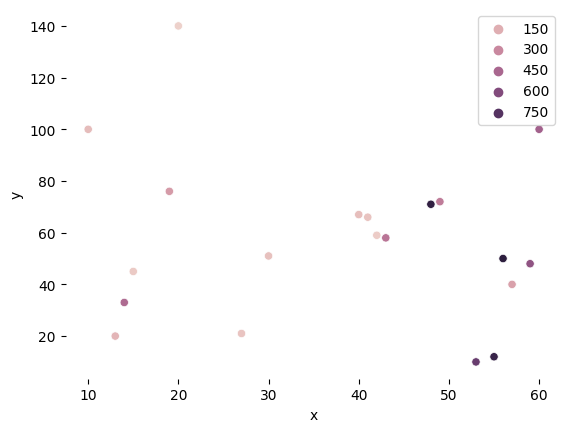

[[5.00000000e+01 7.29620000e+04]
 [9.27846970e+01 6.55220000e+04]
 [8.12711511e+01 1.25000000e+03]
 [7.10633520e+01 9.54845000e+04]
 [4.75078941e+01 3.35405000e+04]
 [5.65685425e+01 1.10450000e+05]
 [8.56154192e+01 8.69445000e+04]
 [5.74543297e+01 8.16080000e+04]
 [3.85875628e+01 7.72245000e+04]
 [3.89486842e+01 8.61125000e+04]
 [4.47772264e+01 1.00352000e+05]
 [4.53100430e+01 4.70450000e+03]
 [3.13847097e+01 7.60500000e+04]
 [3.00832179e+01 7.93800000e+03]
 [9.02718118e+01 2.06045000e+04]
 [8.81419310e+01 6.58845000e+04]
 [5.01597448e+01 8.24180000e+04]
 [6.00749532e+01 3.97620000e+04]
 [5.20096145e+01 2.17800000e+03]
 [0.00000000e+00 0.00000000e+00]]


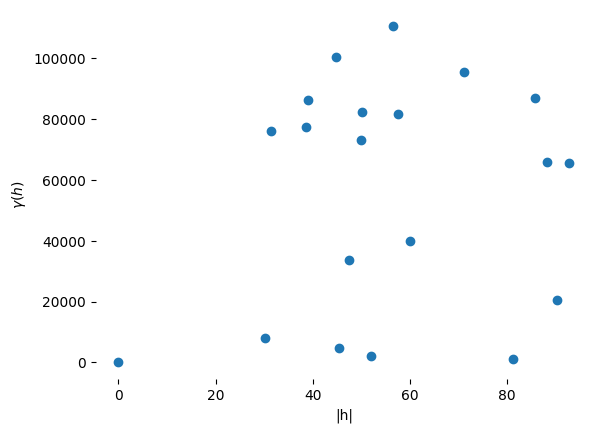

'# Variograma experimental\n\nbins_variogramaexp = []\ncuenta_variogramaexp = []\nsuma_variogramaexp = []\n\nbins = 40\ndistancia_media = distanciamax/2.0\nfor i in range(bins):\n    bins_variogramaexp.append(distancia_media*(i+0.5)/bins)\n    suma_variogramaexp.append(0.0)\n    cuenta_variogramaexp.append(0)\n\n\nfor punto in puntos_variograma:\n    bin_correcto = math.floor(bins*punto[0]/distancia_media)\n    if bin_correcto < bins:\n        suma_variogramaexp[bin_correcto] += punto[1]\n        cuenta_variogramaexp[bin_correcto] += 1\n\npromedio_variogramaexp = []\nfor i in range(bins):\n    if cuenta_variogramaexp[i] > 0.0:\n        promedio_variogramaexp.append(suma_variogramaexp[i]/cuenta_variogramaexp[i])\n    else:\n        promedio_variogramaexp.append(0.0)\n\nexponencial_variogramateorico = []\ngaussiano_variogramateorico = []\nesferico_variogramateorico = []\nestiloexp = []\nestilogaussiano = []\nestiloesferio = []\n\nsill_exp = 0\nsill_gauss = 0\nsill_esferico = 0\n\nrange_e

In [23]:

# input
lista_puntos = []
with open('C:/Users/ferna/Documents/documentos/Universidad/Servicio-Social-CienciadeDatos/myNotebooks/samplexyz.csv') as csvfile:
    reader = csv.reader(csvfile,delimiter=",")
    header = next(reader)
    for line in reader:
        p = list(map(float,line))
        lista_puntos.append(p)
print(lista_puntos)


# quitar duplicados

lista_depuntos_sindobles = []
for punto1 in lista_puntos:
    repetidos = False
    for punto2 in lista_depuntos_sindobles:
        if punto1[0] == punto2[0] and punto1[1] == punto2[1]:
            repetidos = True
    if repetidos == False:
        lista_depuntos_sindobles.append(punto1)
    else:
        print("Punto repetido " + str(punto1[0]) + " " + str(punto1[1]))

puntos = np.array(lista_depuntos_sindobles)


# Una lista de listas de puntos [x,y,z] 
print(puntos)


# grafica del conjunto de puntos

plt.figure(1)
dataplot = sns.scatterplot(x=puntos[:,0], y=puntos[:,1], hue=puntos[:,2]) # hue=puntos[:,2]
sns.despine(left=True,bottom=True)
plt.xlabel('x')
plt.ylabel('y')

# Mostramos una grafica en 2D de x,y y z. Colocamos de distintos colores a z para mostrar las diferencias.
plt.show()


# nube de variograma
lista_puntos_variograma = []
distanciamax = 0.0
probabilidad = 1.0
for punto1 in puntos:
    for punto2 in puntos:
        if random.random() >= probabilidad:
            continue
    h = distancia(punto1,punto2)
    if h > distanciamax:
        distanciamax = h
    lista_puntos_variograma.append([h,0.5*(punto2[2]-punto1[2])*(punto2[2]-punto1[2])])

puntos_variograma = np.array(lista_puntos_variograma)

# Imprimimos puntos
print(puntos_variograma)

plt.figure(2)
plt.plot(puntos_variograma[:,0],puntos_variograma[:,1], 'o')
sns.despine(left=True,bottom='True')
plt.xlabel("|h|")
plt.ylabel("$\gamma(h)$")

# Mostramos nube de variograma
plt.show()


In [10]:
# Create logistic map

def generate_logistic_map(r: float, size: int, initial_ratio: float) -> np.array:
    # rxn(1-xn)
    vals = [initial_ratio]
    for _ in range(size-1):
        new_val = r * vals[-1] * (1 - vals[-1])
        vals.append(new_val)
    return np.array(vals)


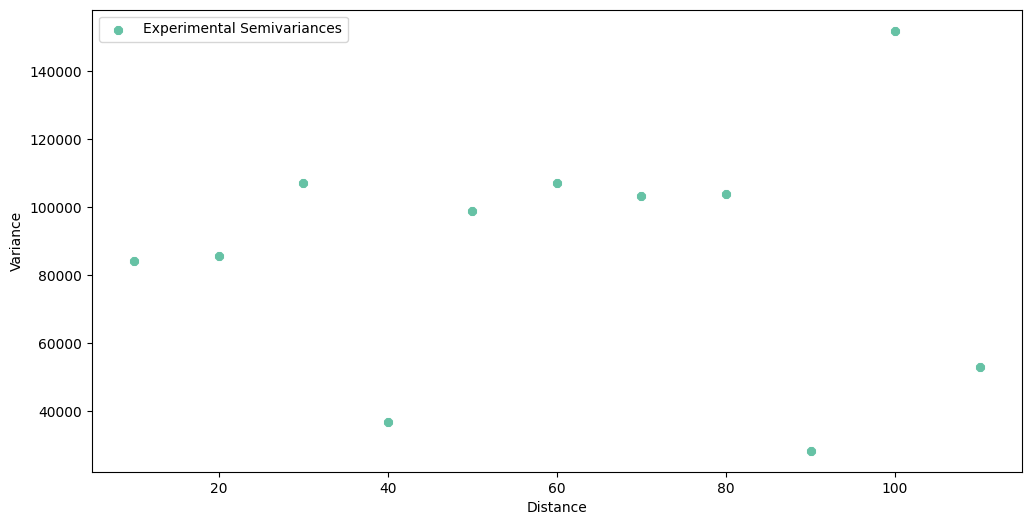

In [24]:
step_radius = 10
max_range = 120

experimental_variogram = build_experimental_variogram(puntos,step_radius,max_range)

experimental_variogram.plot()

In [12]:
#experimental_variogram.plot(plot_semivariance=True, plot_covariance=True, plot_variance=True)
#semivars = experimental_variogram.experimental_semivariance_array.copy()


In [13]:
#plt.figure(figsize=(15, 6))
#plt.scatter(semivars[:, 0], semivars[:, 1])
#plt.show()

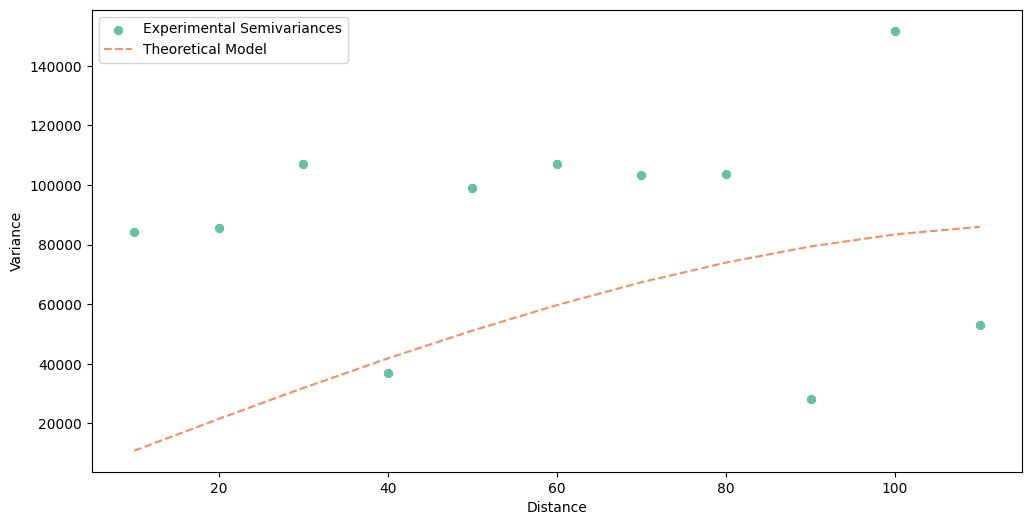

* Selected model: Spherical model
* Nugget: 0.0
* Sill: 86856.51000000001
* Range: 120
* Spatial Dependency Strength is Unknown
* Mean Bias: 32060.338460783867
* Mean RMSE: 52420.56915441953
* Error-lag weighting method: None


+-------+--------------------+--------------------+---------------------+
|  lag  |    theoretical     |    experimental    |     bias (y-y')     |
+-------+--------------------+--------------------+---------------------+
|  10.0 | 10831.931657986113 | 84220.53846153847  |  73388.60680355235  |
|  20.0 | 21513.07076388889  | 85550.22222222222  |  64037.151458333334 |
|  30.0 | 31892.624765625005 | 107016.60344827586 |  75123.97868265085  |
|  40.0 | 41819.80111111112  | 36802.54347826087  |  -5017.257632850247 |
|  50.0 | 51143.80724826389  | 98961.24390243902  |  47817.43665417513  |
|  60.0 | 59713.85062500001  | 107012.48148148147 |  47298.63085648147  |
|  70.0 | 67379.13868923612  | 103263.55555555556 |  35884.41686631944  |
|  80.0 |  73988.8788888889  | 1

In [25]:
semivars = build_theoretical_variogram(
    experimental_variogram=experimental_variogram, 
    model_type='spherical', 
    sill=experimental_variogram.variance, 
    rang = 120)

semivars.plot()

print(semivars)

In [27]:
valor_conocido = puntos[5]
print(valor_conocido)

[ 20. 140.  12.]


In [33]:
# kriging recibe los el conjunto de puntos, la tabla de 
# teorico-exponencial-bias y algun valor z del que
# conocer a que pareja ordenada x,y corresponderia su valor


ok_interpolacion = kriging(puntos,semivars,[valor_conocido[:-1]])
ok_interpolacion

100%|██████████| 1/1 [00:00<?, ?it/s]


array([[ 12.,  nan,  20., 140.]])

In [ ]:
def test_kriging(train_data, variogram_model, ktype, test_values, number_of_neighbors, sk_mean_value=None):
    predictions = kriging(observations=train_data,
                          theoretical_model=variogram_model,
                          points=test_values[:, :-1],
                          how=ktype,
                          no_neighbors=number_of_neighbors,
                          number_of_workers=1,
                          sk_mean=sk_mean_value)
    mse = np.mean((predictions[:, 0] - test_values[:, -1])**2)
    rmse = np.sqrt(mse)
    return rmse